##### Standard usage:  
-Run the raw code toggle cell  

-Select a pkl with the "Get File Path" button


### Raw Code Toggle

If code is hidden and you don't see a button, click the hidden cell right below this cell and run it.  
- It's very thin and between this cell and the "Get File Path" cell, sorry for the inconvenience

In [13]:
from IPython.display import Javascript,display
from corticalmapping.ipython_lizard.html_widgets import raw_code_toggle
raw_code_toggle()
display(Javascript("""var nb = IPython.notebook;
                      var is_code_cell = (nb.get_selected_cell().cell_type == 'code');
                      var curr_idx = (nb.get_selected_index() == 3);
                      if (is_code_cell) {
                          nb.execute_cell();
                      }"""))

In [14]:
from IPython.display import Javascript
from corticalmapping.ipython_lizard.ipython_filedialog import IPythonTkinterFileDialog
initial_dir = r"C:"

tkinter_file_dialog = IPythonTkinterFileDialog(initial_dir)
tkinter_file_dialog.execute_below = True
tkinter_file_dialog.show()

In [15]:
import os
from PyQt4 import QtGui,QtCore
import matplotlib.pyplot as plt
import matplotlib as mpl
from warnings import warn
#mpl.rcParams['figure.figsize'] = 10, 10
from corticalmapping import ipython_lizard
from corticalmapping.ipython_lizard.wrapped_retinotopic_mapping import WrappedRetinotopicMapping
from corticalmapping.ipython_lizard.patchplot_ipywidgets import PatchPlotWidgets
from corticalmapping.ipython_lizard.html_widgets import getSignMapWidget,getRawPatchMapWidget,getRawPatchesWidget, \
                                                        splitPatchesWidget,mergePatchesWidget,getEccentricityMapWidget, \
                                                        saveFinalResultWidget

%matplotlib inline
#%load_ext autoreload
#%autoreload 2

In [16]:
pkl_path = tkinter_file_dialog.file_path

TEST_PKL_IDX = 0
TEST_PATH = ipython_lizard.TEST_PKLS[TEST_PKL_IDX] #there are like 6  different test pkls in this iterable
current_dir = os.getcwd()
adj_pkl_paths = [os.path.join(current_dir,f) for f in os.listdir(current_dir) if f.endswith("pkl")]
if adj_pkl_paths:
    adj_pkl_path = adj_pkl_paths[0]
else:
    adj_pkl_path = None
pkls = zip(["MANUAL","ADJACENT","TEST"],[pkl_path,adj_pkl_path,TEST_PATH])
for p_type,pkl in pkls:
    try:
        trial = WrappedRetinotopicMapping.load_from_pkl(pkl)
        print "Successfully loaded from: {0}, {1}".format(p_type,pkl)
        __pkl_path = pkl
        break
    except Exception as e:
        #warn(str(e))
        warn("Failed to load from: {0}, {1}".format(p_type,pkl))

Successfully loaded from: TEST, \\AIBSDATA2\nc-ophys\JunRetinotopicTestPkls\20150618_M180702_Trial1_2_3_4.pkl


C:\Anaconda\Lib\site-packages\ipykernel\__main__.py:20: UserWarning: Failed to load from: MANUAL, None
C:\Anaconda\Lib\site-packages\ipykernel\__main__.py:20: UserWarning: Failed to load from: ADJACENT, None


# Calculate sign map
## phaseMapFilterSigma:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the sigma value of Gaussian filter for altitude and azimuth maps  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, defult = 1.0, recommended range: [0.0, 2.0]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;large "phaseMapFilterSigma" gives you more patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;small "phaseMapFilterSigma" gives you less patches  
## signMapFilterSigma:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the sigma value of Gaussian filter for visual sign maps  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, defult = 9.0, recommended range: [0.6, 10.0]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;large "signMapFilterSigma" gives you less patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;small "signMapFilterSigma" gives you more patches  
<br>

phaseMapFilterSigma: 1.0
signMapFilterSigma: 9.0
isReverse: False
isPlot: True
isFixedRange: True


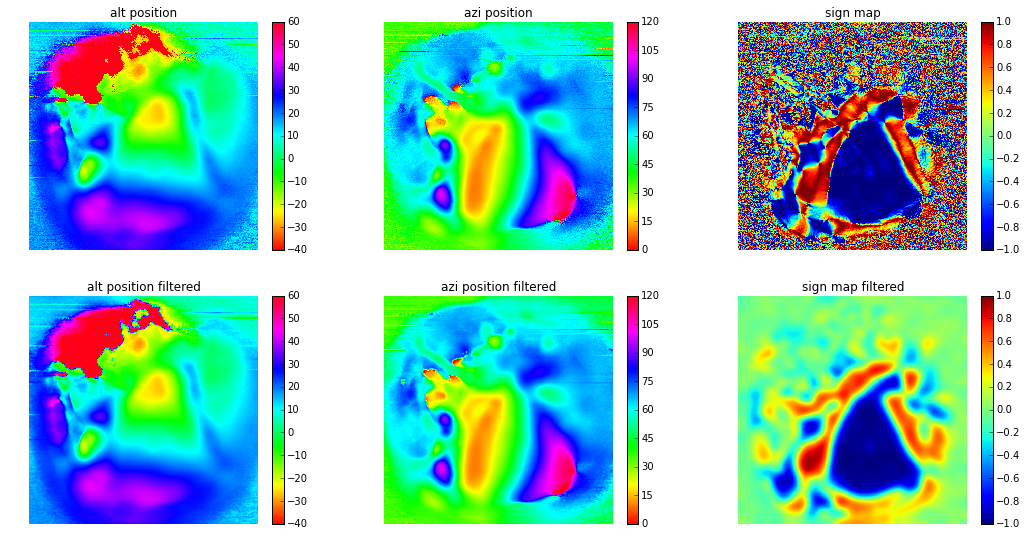

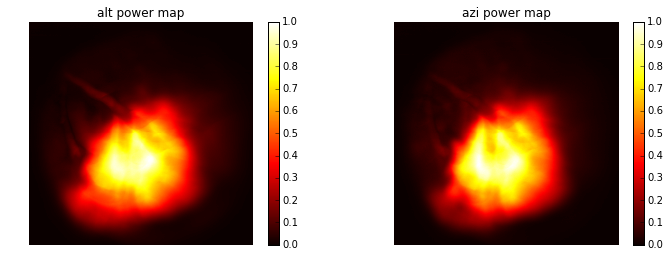

In [17]:
phaseMapFilterSigma = 1.0
signMapFilterSigma = 9.0

getSignMapWidget(trial,
                 phaseMapFilterSigmaDefault=phaseMapFilterSigma,
                 signMapFilterSigmaDefault=signMapFilterSigma,
)

<br>
# Get raw patch map
<br>
## signMapThr:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;threshold to binarize visual signmap   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 0.35, recommended range: [0.2, 0.5]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;large signMapThr gives you fewer patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;smaller signMapThr gives you more patches  
## closeIter:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;binary close iteration for each raw patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 3  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;you do not want to change this parameter very often.  
## openIter:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;binary open iteration for each raw patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 3  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;you do not want to change this parameter very often.  
<br>

signMapThr: 0.35
operIter: 3
closeIter: 3


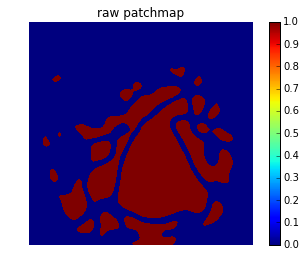

In [18]:
signMapThr = 0.35
openIter = 3
closeIter = 3


getRawPatchMapWidget(trial,
                     signMapThrDefault=signMapThr,
                     openIterDefault=openIter,
                     closeIterDefault=closeIter,
)

<br>
# Get dictionary for raw patches
<br>
## dilationIter:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;binary dilation iteration for each raw patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 15  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;you do not want to change this parameter very often.  
## borderWidth:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pixel number between adjcent patches   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 1  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;you do not want to change this parameter very often.  
## smallPatchThr: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the patches with pixel number below this number will be discarded   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 100  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;you do not want to change this parameter very often.  
<br>

dilationIter: 15
borderWidth: 1
smallPatchThr: 100


C:\Anaconda\Lib\site-packages\skimage\measure\_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  connectivity=None):


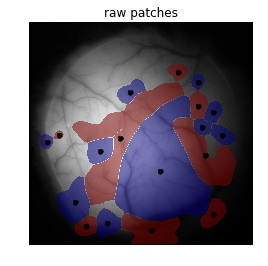

In [19]:
dilationIter = 15
borderWidth = 1
smallPatchThr = 100

getRawPatchesWidget(trial,
                   dilationIterDefault=dilationIter,
                   borderWidthDefault=borderWidth,
                   smallPatchThrDefault=smallPatchThr,
)

<br>
# Calculate determinant map

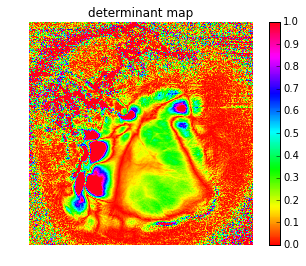

In [20]:
trial.getDeterminantMap(True)

<br>
# Calculate eccentricity map  
<br>
## eccMapFilterSigma:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the sigma value of Gaussian filter for eccentricity maps  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 10.0, recommend range: [5, 15]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You do not want to change this parameter very often, and it may take some time to run.  
<br>

eccMapFilterSigma: 10.0


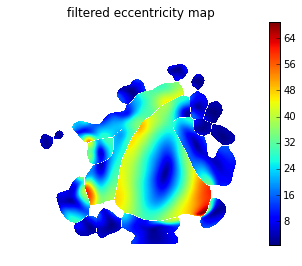

In [21]:
eccMapFilterSigma = 10.0

getEccentricityMapWidget(trial,eccMapFilterSigmaDefault=eccMapFilterSigma)

<br>
# Split overlapping patches
<br>
## visualSpacePixelSize:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the pixel size for patch to visual space mapping  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 0.5  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You do not want to change this parameter very often  
## visualSpaceCloseIter:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the binary iteration for visual space coverage for each patch  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;INT, default = 15  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You do not want to change this parameter very often  
## splitLocalMinCutStep:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the step width for detecting number of local minimums during spliting  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 5.0, recommend range: [0.5, 15.0]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Small "splitLocalMinCutStep" will make it more likely to split but into less sub patches  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Large "splitLocalMinCutStep" will make it less likely to split but into more sub patches  
## splitOverlapThr:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;patches with overlap ratio larger than this value will go through the split procedure  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Small "splitOverlapThr" will split more patches    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Large "splitOverlapThr" will split less patches

visualSpacePixelSize: 0.5
visualSpaceCloseIter: 15
splitLocalMinCutStep: 5.0
splitOverlapThr: 1.2
borderWidth: 1
patch05 AU=2062.75  AS=2049.3049795  ratio=0.993481992243
patch18 AU=48.0  AS=48.7238978154  ratio=1.01508120449
patch09 AU=216.25  AS=202.491693182  ratio=0.93637777194
patch08 AU=283.5  AS=355.899375732  ratio=1.25537698671
Only one local minumum was found!!!
patch04 AU=672.5  AS=679.959373541  ratio=1.01109200527
patch12 AU=156.25  AS=143.587190655  ratio=0.918958020195
patch13 AU=39.5  AS=35.6139971974  ratio=0.901620182214
patch07 AU=166.25  AS=149.982312618  ratio=0.902149248832
patch11 AU=43.25  AS=40.5262903122  ratio=0.937024053461
patch16 AU=73.25  AS=76.6343783627  ratio=1.04620311758
patch17 AU=51.0  AS=50.0620620335  ratio=0.98160905948
patch14 AU=142.75  AS=158.001500129  ratio=1.10684063138
patch15 AU=65.0  AS=61.5630833131  ratio=0.947124358663
patch06 AU=2237.5  AS=2292.60927987  ratio=1.02462984575
patch01 AU=5366.5  AS=6071.79281009  ratio=1.13142510204
pa

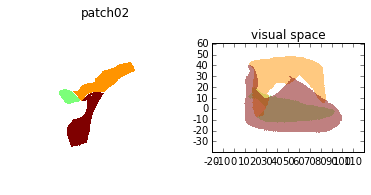

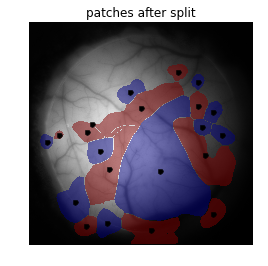

In [22]:
visualSpacePixelSize = 0.5
visualSpaceCloseIter = 15
splitLocalMinCutStep = 5.0
splitOverlapThr = 1.2
borderWidth = 1

splitPatchesWidget(trial,
                   visualSpacePixelSizeDefault=visualSpacePixelSize,
                   visualSpaceCloseIterDefault=visualSpaceCloseIter,
                   splitLocalMinCutStepDefault=splitLocalMinCutStep,
                   splitOverlapThrDefault=splitOverlapThr,
                   borderWidthDefault=borderWidth,
)

# Merge non-overlapping patches
</br>
## mergeOverlapThr:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;considering a patch pair (A and B) with same sign, A has visual coverage a deg<sup>2</sup> and B has visual coverage b deg<sup>2</sup>    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the overlaping visual coverage between this pair is c deg<sup>2</sup>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;then if (c/a < "mergeOverlapThr") and (c/b < "mergeOverlapThr"), these two patches will be merged  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Small "mergeOverlapThr" will merge less patches    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Large "mergeOverlapThr" will merge more patches
<br>

visualSpacePixelSize: 0.5
visualSpaceCloseIter: 15
mergeOverlapThr: 0.1
smallPatchThr: 100
borderWidth: 1
merge iteration: 1


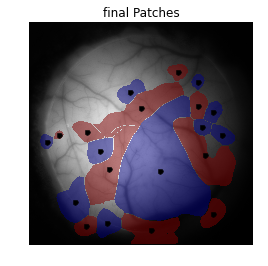

In [23]:
mergeOverlapThr = 0.1
visualSpacePixelSize = 0.5
visualSpaceCloseIter = 15
borderWidth = 1
smallPatchThr = 100

mergePatchesWidget(trial,
                  visualSpacePixelSizeDefault=visualSpacePixelSize,
                  visualSpaceCloseIterDefault=visualSpaceCloseIter,
                  mergeOverlapThrDefault=mergeOverlapThr,
                  borderWidthDefault=borderWidth,
                  smallPatchThrDefault=smallPatchThr)

# Rename patches
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;click the patches and type their desired names according to the reference map below  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;established visual area names are:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[V1, LM, RL, P, PM, AM, AL, LI, LLA, POR, M, A, MMA, MMP, RLL]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the name you typed within this list will show in green, others will show in orange

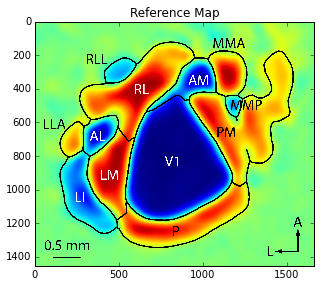

In [24]:
patchplot_widgets = PatchPlotWidgets(trial,{},[],figsize=(5,5))
patchplot_widgets.plot_reference_img()

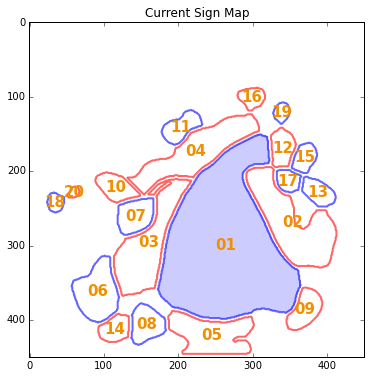

In [25]:
rename_patches_dict = dict(trial.finalPatches)

DESIRED_PATCH_NAMES = ['A','AL','AM','LI','LLA','LM','M','MMA','MMP','P','PM','POR','RL','RLL','RS','S1','V1']

for patch in rename_patches_dict.keys(): #replace 'patch01' with 01, etc
    rename_patches_dict[patch.replace("patch","")] = rename_patches_dict.pop(patch)
patchplot_widgets = PatchPlotWidgets(trial,rename_patches_dict,DESIRED_PATCH_NAMES,figsize=(12,6))

patchplot_widgets.show()

# Plot final borders

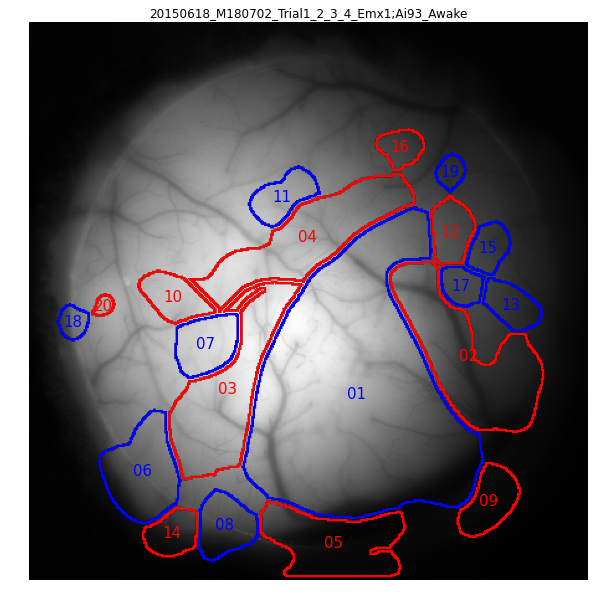

In [26]:
rename_patches_dict = patchplot_widgets.patches_dict
finalPatchBorder_figure = trial.plotFinalPatchBorders(rename_patches_dict,borderWidth=4)

# save
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;save updated pkl file, the current notebook (.ipynb and .html), final borders plot (.png and .pdf) in the folder containing the original pkl file.

In [27]:
pkl_save_path = None
#saveTrialDictPkl(trial,pkl_save_path)
saveFinalResultWidget(trial,finalPatchBorder_figure,__pkl_path,pkl_save_path)